# Sentiment analysis using RNNs

Recurrent neural networks (RNN) are powerful for modeling sequence data such as time series or natural language. Let's implement a RNN model for **sentiment analysis**.


The dataset, `data/corpus.csv`, consists of 800 real movie comments and the corresponding labels that indicate whether the comments are positive or negative. For example:

```
POSTIVE: I absolutely LOVE Harry Potter, as you can tell already.
NEGATIVE: My dad's being stupid about brokeback mountain...
```

## Load the dataset

In [1]:
from data import datasets
dataset = datasets.Sentiment()

[nltk_data] Downloading package punkt to /home/sun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Number of training samples: 600
Number of validation samples: 100
Number of testing samples: 100


## Define and train our RNN model

The input to the network is a sequence of one-hot vectors, each of which represents a word. The 1st Linear layer works as an embedding layer. A TemporalPooling layer is used to aggregate the vectors into one vector, which skips `NaN`s. The rest of the network is the same as a normal classifier.

In [2]:
from nn.loss import SoftmaxCrossEntropy, L2
from nn.optimizers import Adam
from nn.layers import *
from nn.model import Model


model = Model()
model.add(Linear2D(len(dataset.dictionary), 200, name='embedding', initializer=Gaussian(std=0.01)))
model.add(BiRNN(in_features=200, units=75, initializer=Gaussian(std=0.01)))
model.add(Dropout(rate=0.25, name='dropout1'))
model.add(Linear2D(150, 64, name='linear1', initializer=Gaussian(std=0.01)))
model.add(TemporalPooling())
model.add(Dropout(rate=0.25, name='dropout2'))
model.add(Linear2D(64, 2, name='linear2', initializer=Gaussian(std=0.01)))


loss = SoftmaxCrossEntropy(num_class=2)
adam = Adam(lr=0.001, decay=0, sheduler_func=lambda lr, it: lr*0.5 if it%400==0 else lr)
model.compile(optimizer=adam, loss=loss, regularization=L2(w=0.001))

train_results, val_results, test_results = model.train(dataset, 
        train_batch=10, val_batch=100, test_batch=100, epochs=10, 
        val_intervals=-1, test_intervals=55, print_intervals=25)

Epoch 0: 
Train iter 25/60:	acc 0.20, loss 0.71, reg loss 0.01, speed 103.56 samples/sec
Train iter 50/60:	acc 0.50, loss 0.69, reg loss 0.01, speed 103.58 samples/sec
Test acc 0.62, loss 0.68
Epoch 1: 
Train iter 25/60:	acc 0.50, loss 0.70, reg loss 0.00, speed 98.77 samples/sec
Train iter 50/60:	acc 0.50, loss 0.71, reg loss 0.00, speed 101.25 samples/sec
Test acc 0.62, loss 0.67
Epoch 2: 
Train iter 25/60:	acc 0.60, loss 0.66, reg loss 0.00, speed 101.15 samples/sec
Train iter 50/60:	acc 0.60, loss 0.66, reg loss 0.00, speed 103.60 samples/sec
Test acc 0.62, loss 0.66
Epoch 3: 
Train iter 25/60:	acc 0.80, loss 0.20, reg loss 0.01, speed 100.76 samples/sec
Train iter 50/60:	acc 1.00, loss 0.16, reg loss 0.02, speed 104.94 samples/sec
Test acc 0.97, loss 0.13
Epoch 4: 
Train iter 25/60:	acc 1.00, loss 0.00, reg loss 0.02, speed 101.21 samples/sec
Train iter 50/60:	acc 1.00, loss 0.00, reg loss 0.02, speed 103.44 samples/sec
Test acc 0.97, loss 0.13
Epoch 5: 
Train iter 25/60:	acc 1.00

## Plot the loss & accuracy

highest test accuracy: 0.98


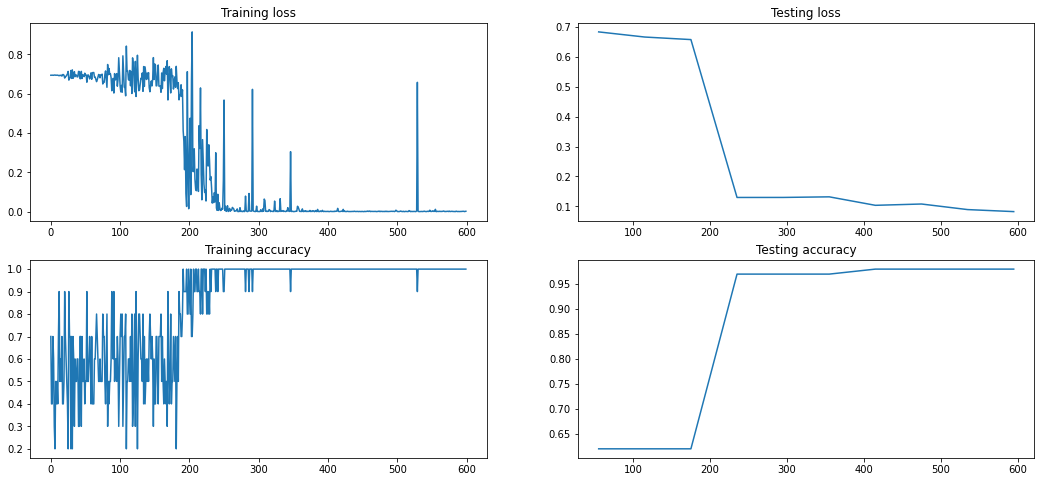

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(18, 8))
plt.subplot(2, 2, 1)
plt.title('Training loss')
plt.plot(train_results[:,0], train_results[:, 1])
plt.subplot(2, 2, 3)
plt.title('Training accuracy')
plt.plot(train_results[:,0], train_results[:, 2])
plt.subplot(2, 2, 2)
plt.title('Testing loss')
plt.plot(test_results[:,0], test_results[:, 1])
plt.subplot(2, 2, 4)
plt.title('Testing accuracy')
plt.plot(test_results[:, 0], test_results[:,2])

print("highest test accuracy: {}".format(max(test_results[:,2])))